In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [2]:
def mnk(t, a): # t == x, a == y
    xy = 0
    xx = 0
    yy = 0
    x = 0
    y = 0
    for j in range(len(t)):
        xy += t[j] * a[j]
        x += t[j]
        y += a[j]
        xx += t[j] * t[j]
        yy += a[j] * a[j]
    xy /= len(t)
    xx /= len(t)
    yy /= len(t)
    x /= len(t)
    y /= len(t)
    k = float((xy - x * y) / (xx - x ** 2))
    b = float(y - k * x)
    rk = float((1 / (len(t) ** 0.5)) * ((yy - y ** 2) / (xx - x ** 2) - k ** 2) ** 0.5)
    rb = float(rk * (xx - x ** 2) ** 2)
    k_b_rk_rb = [k, b, rk, rb]
    return k_b_rk_rb

In [3]:
h = np.zeros(16)
for i in range(len(h)):
    h[i] += 10 ** (-i)

Для N = 3, L = 1 и узлов {x0, x0 - h, x0 + h, x0 + 2h}
соответствующие аналитические коэффициенты = {-1/2, -1/3, 1, -1/6}
результат программы c 16 цифрами после запятой:{-0.5000000000000001, -0.3333333333333333, 1.0000000000000000, -0.1666666666666667}

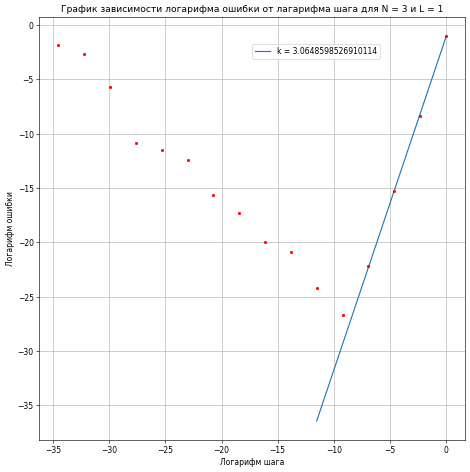

In [67]:
a1 = -0.5000000000000001
a2 = -0.3333333333333333
a3 = 1.0000000000000000
a4 = -0.1666666666666667
mistake_3 = np.abs(a1 * np.exp(1) / h + a2 * np.exp(1 - h) / h +  a3 * np.exp(1 + h) / h + a4 * np.exp(1 + 2 * h) / h - np.exp(1))

fig, ax = plt.subplots(figsize=(10, 10), dpi=55)
ax.grid()

for i in range(len(h)):
    plt.errorbar(np.log(h[i]), np.log(mistake_3[i]), color='r',   fmt='.', capsize=4, elinewidth=1.5, capthick=1.5)

params_3 = mnk(np.log(h[0:4]), np.log(mistake_3[0:4]))
plt.plot(np.log(h[:6]), np.polyval([params_3[0], params_3[1]], np.log(h[:6])), label="k = {}".format(params_3[0]))
ax.set_title("График зависимости логарифма ошибки от лагарифма шага для N = 3 и L = 1")
ax.set_xlabel("Логарифм шага")
ax.set_ylabel("Логарифм ошибки")
plt.legend(loc = (0.5, 0.9))
plt.savefig('N=3, L=1.png')

Для N = 4, L = 1 и узлов {x0, x0 - 2h, x0 - h, x0 + h, x0 + 2h}
соответствующие аналитические коэффициенты = {0, 1/12, -2/3, 2/3, -1/12}
результат программы c 16 цифрами после запятой:{0.0000000000000002, 0.0833333333333335, -0.6666666666666670, 0.6666666666666665, -0.0833333333333333}

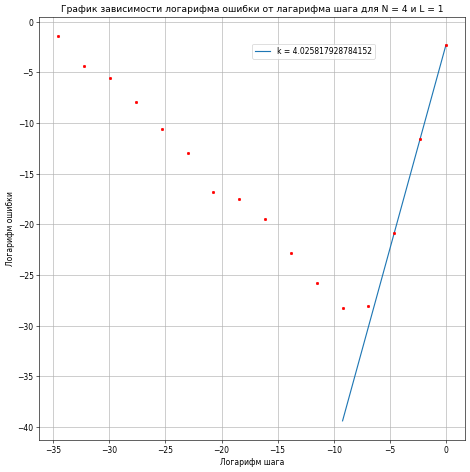

In [68]:
a1 = 0.0000000000000002
a2 = 0.0833333333333335
a3 = -0.6666666666666670
a4 = 0.6666666666666665
a5 = -0.0833333333333333
mistake_4 = np.abs(a1 * np.exp(1) / h + a2 * np.exp(1 - 2 * h) / h + a3 * np.exp(1 - h) / h + a4 * np.exp(1 + h) / h + a5 * np.exp(1 + 2 * h) / h - np.exp(1))

fig, ax = plt.subplots(figsize=(10, 10), dpi=55)
ax.grid()

for i in range(len(h)):
    plt.errorbar(np.log(h[i]), np.log(mistake_4[i]), color='r',   fmt='.', capsize=4, elinewidth=1.5, capthick=1.5)

params_4 = mnk(np.log(h[0:3]), np.log(mistake_4[0:3]))
plt.plot(np.log(h[:5]), np.polyval([params_4[0], params_4[1]], np.log(h[:5])), label="k = {}".format(params_4[0]))
ax.set_title("График зависимости логарифма ошибки от лагарифма шага для N = 4 и L = 1")
ax.set_xlabel("Логарифм шага")
ax.set_ylabel("Логарифм ошибки")
plt.legend(loc = (0.5, 0.9))
plt.savefig('N=4, L=1.png')

Для N = 5, L = 1  и узлов {x0, x0 - 2h, x0 - h, x0 + h, x0 + 2h, x + 3h}
соответствующие аналитические коэффициенты = {-1/3, 1/20, -1/2, 1, -1/4, 1/30}
результат программы c 16 цифрами после запятой:{-0.3333333333333332, 0.0500000000000000, -0.5000000000000000, 0.9999999999999999,
 -0.2499999999999999, 0.0333333333333333}

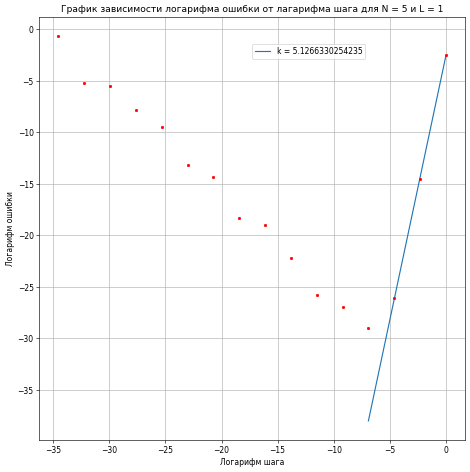

In [74]:
a1 = -0.3333333333333332
a2 = 0.0500000000000000
a3 = -0.5000000000000000
a4 = 0.9999999999999999
a5 = -0.2499999999999999
a6 = 0.0333333333333333
mistake_5 = np.abs(a1 * np.exp(1) / h + a2 * np.exp(1 - 2 * h) / h + a3 * np.exp(1 - h) / h + a4 * np.exp(1 + h) / h + a5 * np.exp(1 + 2 * h) / h
            + a6 * np.exp(1 + 3 * h) / h - np.exp(1))

fig, ax = plt.subplots(figsize=(10, 10), dpi=55)
ax.grid()

for i in range(len(h)):
    plt.errorbar(np.log(h[i]), np.log(mistake_5[i]), color='r',   fmt='.', capsize=4, elinewidth=1.5, capthick=1.5)

params_5 = mnk(np.log(h[0:3]), np.log(mistake_5[0:3]))
plt.plot(np.log(h[:4]), np.polyval([params_5[0], params_5[1]], np.log(h[:4])), label="k = {}".format(params_5[0]))
ax.set_title("График зависимости логарифма ошибки от лагарифма шага для N = 5 и L = 1")
ax.set_xlabel("Логарифм шага")
ax.set_ylabel("Логарифм ошибки")
plt.legend(loc = (0.5, 0.9))
plt.savefig('N=5, L=1.png')

Для N = 3, L = 2  и узлов {x0, x0 - h, x0 + h, x0 + 2h}
соответствующие аналитические коэффициенты = {-2, 1, 1, 0}
результат программы c 16 цифрами после запятой:{-2.0000000000000000, 1.0000000000000000, 1.0000000000000000, 0.0000000000000001}

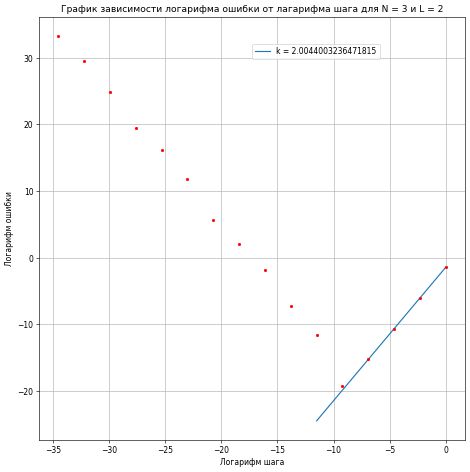

In [87]:
a1 = -2.0000000000000000
a2 = 1.0000000000000000
a3 = 1.0000000000000000
a4 = 0.0000000000000001
mistake_3 = np.abs(a1 / h * np.exp(1) / h  + a2 / h * np.exp(1 - h) / h + a3 / h * np.exp(1 + h) / h  + a4 / h * np.exp(1 + 2 * h) / h - np.exp(1))

fig, ax = plt.subplots(figsize=(10, 10), dpi=55)
ax.grid()

for i in range(len(h)):
    plt.errorbar(np.log(h[i]), np.log(mistake_3[i]), color='r',   fmt='.', capsize=4, elinewidth=1.5, capthick=1.5)

params_3 = mnk(np.log(h[0:4]), np.log(mistake_3[0:4]))
plt.plot(np.log(h[:6]), np.polyval([params_3[0], params_3[1]], np.log(h[:6])), label="k = {}".format(params_3[0]))
ax.set_title("График зависимости логарифма ошибки от лагарифма шага для N = 3 и L = 2")
ax.set_xlabel("Логарифм шага")
ax.set_ylabel("Логарифм ошибки")
plt.legend(loc = (0.5, 0.9))
plt.savefig('N=3, L=2.png')

Для N = 4, L = 2  и узлов {x0, x0 - 2h, x0 - h, x0 + h, x0 + 2h}
соответствующие аналитические коэффициенты = {-5/2, -1/12, 4/3, 4/3, -1/12}
результат программы c 16 цифрами после запятой:{-2.5000000000000000, -0.0833333333333331, 1.3333333333333330, 1.3333333333333335, -0.0833333333333334}

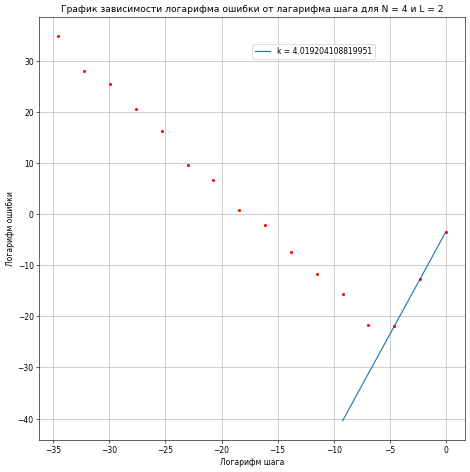

In [85]:
a1 = -2.5000000000000000
a2 = -0.0833333333333331
a3 = 1.3333333333333330
a4 = 1.3333333333333335
a5 = -0.0833333333333334
mistake_4 = np.abs(a1 * np.exp(1) / h ** 2 + a2 * np.exp(1 - 2 * h) / h ** 2 + a3 * np.exp(1 - h) / h ** 2 + a4 * np.exp(1 + h) / h ** 2 + a5 * np.exp(1 + 2 * h) / h ** 2 - np.exp(1))

fig, ax = plt.subplots(figsize=(10, 10), dpi=55)
ax.grid()

for i in range(len(h)):
    plt.errorbar(np.log(h[i]), np.log(mistake_4[i]), color='r',   fmt='.', capsize=4, elinewidth=1.5, capthick=1.5)

params_4 = mnk(np.log(h[0:3]), np.log(mistake_4[0:3]))
plt.plot(np.log(h[:5]), np.polyval([params_4[0], params_4[1]], np.log(h[:5])), label="k = {}".format(params_4[0]))
ax.set_title("График зависимости логарифма ошибки от лагарифма шага для N = 4 и L = 2")
ax.set_xlabel("Логарифм шага")
ax.set_ylabel("Логарифм ошибки")
plt.legend(loc = (0.5, 0.9))
plt.savefig('N=4, L=2.png')

Для N = 5, L = 1  и узлов {x0, x0 - 2h, x0 - h, x0 + h, x0 + 2h, x + 3h}
соответствующие аналитические коэффициенты = {-5/2, -1/12, 4/3, 4/3, -1/12, 0}
результат программы c 16 цифрами после запятой:{-2.5000000000000000, -0.0833333333333331, 1.3333333333333330, 1.3333333333333335,
 -0.0833333333333334, 0.0000000000000000}

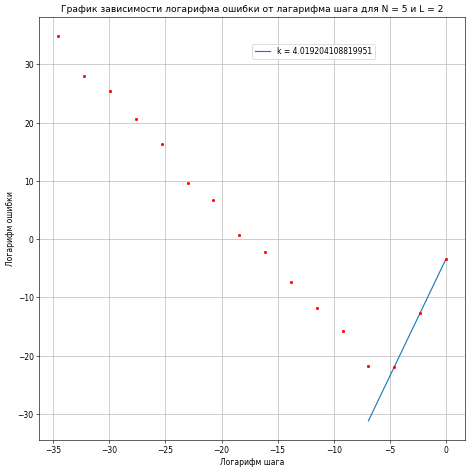

In [84]:
a1 = -2.5000000000000000
a2 = -0.0833333333333331
a3 = 1.3333333333333330
a4 = 1.3333333333333335
a5 = -0.0833333333333334
a6 = 0.0000000000000000
mistake_5 = np.abs(a1 * np.exp(1) / h ** 2 + a2 * np.exp(1 - 2 * h) / h ** 2 + a3 * np.exp(1 - h) / h ** 2 + a4 * np.exp(1 + h) / h ** 2 + a5 * np.exp(1 + 2 * h) / h ** 2
            + a6 * np.exp(1 + 3 * h) / h ** 2 - np.exp(1))

fig, ax = plt.subplots(figsize=(10, 10), dpi=55)
ax.grid()

for i in range(len(h)):
    plt.errorbar(np.log(h[i]), np.log(mistake_5[i]), color='r',   fmt='.', capsize=4, elinewidth=1.5, capthick=1.5)

params_5 = mnk(np.log(h[0:3]), np.log(mistake_5[0:3]))
plt.plot(np.log(h[:4]), np.polyval([params_5[0], params_5[1]], np.log(h[:4])), label="k = {}".format(params_5[0]))
ax.set_title("График зависимости логарифма ошибки от лагарифма шага для N = 5 и L = 2")
ax.set_xlabel("Логарифм шага")
ax.set_ylabel("Логарифм ошибки")
plt.legend(loc = (0.5, 0.9))
plt.savefig('N=5, L=2.png')